
# Boston Dataset - Étude de la Régression Linéaire, Ridge et Lasso




Copier ce fichier notebook dans le même répertoire que celui créée au dernier cours où nous avons été chercher tous les fichiers reliés au livre "Le machine learning" avec Python de A Müller.

In [2]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.utils import Bunch

ajout de : 
from sklearn.utils import Bunch
pour résoudre ceci :

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[3], line 1
----> 1 boston = load_boston()

Cell In[2], line 11, in load_boston()
      9 data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
     10 target = raw_df.values[1::2, 2]
---> 11 return Bunch(data=data, target=target)

NameError: name 'Bunch' is not defined

## Partie 1 : Exploration du code `load_boston`


Allez chercher le mot-clé **"boston"** dans `mglearn/datasets.py`. Vous trouverez

In [5]:
def load_boston():
    try:
        from sklearn.datasets import load_boston
        return load_boston()
    except ImportError:
         pass
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return Bunch(data=data, target=target)

sep pour separateur
r pour texte brut
s+ pour un ou plusieurs espaces tabulations comprises
skiprows=22 pour sauter les 22 lignes commentaires en debut de fichier
header=None pour dire aucune entete
[::2, :] pour un element sur 2 sur les lignes et toutes les colonnes
[1::2, :2] commencer a partir de la 2eme ligne et prendre 1 element sur 2 et prendre les 2 premieres colonnes.
[1::2, 2] commencer a partir de la 2eme ligne et prendre 1 element sur 2 et prendre uniquement la 3eme colonne.

à la place de cette définition de la fonction load_boston(), on pourrait faire tout simplement L'import suivant :
from mglearn.datasets import load_boston

In [6]:
#initialisation (exemple)
boston = load_boston()


In [7]:
data = boston.data
target = boston.target

In [10]:
print("Data Shape:", data.shape)
print("Target Shape:", target.shape)

Data Shape: (506, 13)
Target Shape: (506,)


In [9]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])


1. Le code vous renvoie vers un site web.

            ➡️ Quel est ce site ? 
            http://lib.stat.cmu.edu/datasets/boston

             Pourquoi le code redirige ici ?
             On y retrouve les données et leur description
            

2. Identifiez le type Python des objets suivants (exécutez les morceaux de code si nécessaire) :

- raw_df : dataframe <class 'pandas.core.frame.DataFrame'>

- raw_df.values    numpy.ndarray

- data    numpy.ndarray

- target <class 'numpy.ndarray'>

- Bunch  c est une classe

3. Dans la définition de raw_df, on trouve ceci : voir plus bas


In [9]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

In [10]:
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

In [11]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [12]:
print(type(raw_df))

<class 'pandas.core.frame.DataFrame'>


In [13]:
raw_df.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.0000e+00, 2.9600e+02,
        1.5300e+01],
       [3.9690e+02, 4.9800e+00, 2.4000e+01, ...,        nan,        nan,
               nan],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       ...,
       [3.9345e+02, 6.4800e+00, 2.2000e+01, ...,        nan,        nan,
               nan],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [3.9690e+02, 7.8800e+00, 1.1900e+01, ...,        nan,        nan,
               nan]])

In [16]:
type(raw_df.values)


numpy.ndarray

In [17]:
print(type(raw_df.values))

<class 'numpy.ndarray'>


In [21]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [22]:
type(data)

numpy.ndarray

In [11]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [12]:
print(type(target))

<class 'numpy.ndarray'>


In [13]:
Bunch

sklearn.utils._bunch.Bunch

In [15]:
print(type(Bunch))

<class 'type'>


            ➡️ Que signifient les paramètres sep, skiprows et header ?
sep pour separateur
skiprows pour sauter des lignes
header pour specifier une entete ou pas

            ➡️ Pourquoi ces valeurs ont-elles été choisies ici d’après vous ?
            pour bien traiter les donnees dans le fichier

4. Que fait la fonction hstack ?  concatenation horizontale de tableaux

            ➡️ De quelle bibliothèque provient-elle ?     Numpy

            ➡️ Après son exécution, combien de features (colonnes) contient data ?    print("Data Shape:", data.shape)  resultat : Data Shape: (506, 13)


5. Que fait exactement raw_df.values ? c est une methode qui renvoie des valeurs sous forme de tableau Numpy.

            ➡️ Quel type d'objet cela renvoie-t-il ? array Numpy

6. Que fait la ligne raw_df.values[::2, :] ? [::2, :] pour un element sur 2 sur les lignes et toutes les colonnes

            ➡️ Sois précis : que sélectionne cette syntaxe, sur quelles dimensions (lignes, colonnes) ? 1 element sur 2 sur toutes les lignes et prendre toutes les colonnes.

7. Pourquoi le code essaie-t-il d'importer load_boston depuis sklearn et prévoit un plan B si ça échoue ?   si le data serait retire a l interne, on renvoie a la source.

            ➡️ Pourquoi sklearn a-t-il retiré ce dataset de ses datasets intégrés ? (pensez biais et éthique)

            de premiere vue, on se libere de devoir gerer des donnees (si on considere tout le morceau gouvernance de donnees) mais aussi toute mise a jour serait disponible a la source.

# Partie 2 : Régression linéaire classique

Mettez-ce fichier dans le même répertoire créé au précédent cours. 

In [ ]:
import matplotlib.pyplot as plt

In [22]:

import mglearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("Forme de X:", X.shape)
print("Forme de y:", y.shape)
print("Score d'entraînement : {:.2f}".format(lr.score(X_train, y_train)))
print("Score de test : {:.2f}".format(lr.score(X_test, y_test)))


Forme de X: (506, 104)
Forme de y: (506,)
Score d'entraînement : 0.95
Score de test : 0.61


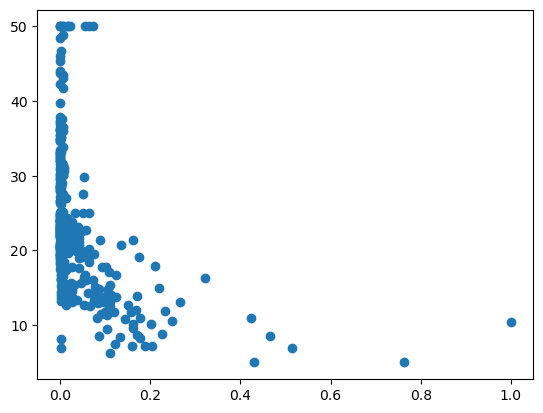

In [27]:
plt.plot(X_train[:, 0], y_train, "o", label="train")



1. Combien d'enregistrements (lignes) et de features (colonnes) contient X ?    
lignes : 506
colonnes : 104

2. Combien de données sont utilisées dans le set d’entraînement et dans le set de test ?

3. Combien de paramètres 𝜃 le modèle apprend-il ? 

            ➡️ À combien de caractéristiques/features correspondent ces paramètres ?

4. Affichez lr.coef_ et lr.intercept_. 

            ➡️ Que représentent ces deux attributs ?




In [17]:

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("Paramètres non nuls:", np.count_nonzero(lr.coef_))


Coefficients: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.9366647

# Partie 3 : Régression Ridge (L2)

In [25]:
import matplotlib.pyplot as plt

In [26]:

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Score Ridge entraînement : {:.2f}".format(ridge.score(X_train, y_train)))
print("Score Ridge test : {:.2f}".format(ridge.score(X_test, y_test)))

print("Valeur par défaut de alpha:", ridge.alpha)

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)




Score Ridge entraînement : 0.89
Score Ridge test : 0.75
Valeur par défaut de alpha: 1.0


In [19]:
print(ridge.alpha)

1.0


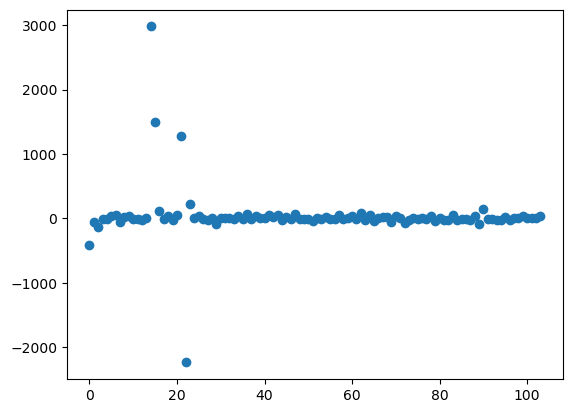

In [29]:
plt.plot(lr.coef_, 'o')

1. Comparez les scores d’entraînement et de test avec ceux du modèle linéaire classique.  

            ➡️ Qu’observez-vous ? Que cela vous inspire-t-il sur le comportement du modèle ?

2. Quelle est la valeur par défaut du paramètre alpha dans Ridge ?   

            ➡️ Affichez-la avec ridge.alpha.     reponse 1

3. Testez maintenant 3 valeurs différentes d'alpha : 0.1, 1 et 10.   

            ➡️ Comparez :

- les scores d’entraînement et de test.

- le nombre de paramètres non nuls (np.count_nonzero(ridge.coef_)).

- la répartition des valeurs dans ridge.coef_ (comparez les coefficients obtenus).

# Partie 4 : Régression Lasso (L1)

In [24]:

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)






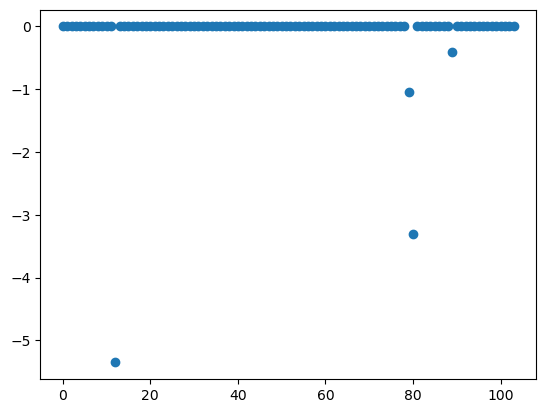

In [30]:
plt.plot(lasso.coef_, 'o', label="lasso")


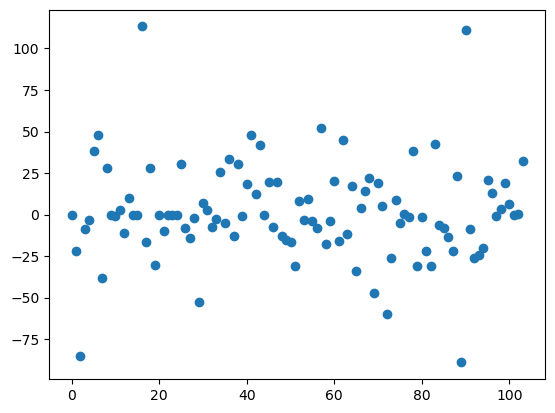

In [31]:
plt.plot(lasso00001.coef_, 'o', label="lasso alpha=0.0001")

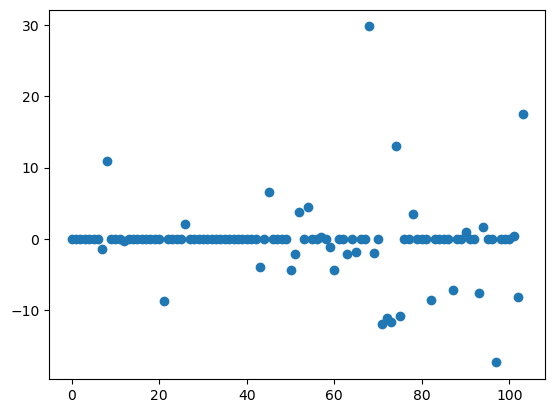

In [32]:
plt.plot(lasso001.coef_, 'o', label="lasso alpha=0.01")

Questions :

1. Pour chaque modèle (lasso, lasso001, lasso00001) :

- Affichez le score d'entraînement et de test.

- Comptez le nombre de paramètres non nuls.

- Observez la différence dans les valeurs de coef_.

2. Comparez ces résultats avec Ridge et LinearRegression.

➡️ Qu’est-ce que cela vous apprend sur le rôle d’alpha et sur l’effet de la régularisation L1 par rapport à L2 ?


💡 Bonus :
Expliquez, en une phrase, dans quel cas vous recommanderiez Lasso plutôt que Ridge, et inversement.
